In [142]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

In [143]:
#initialization
#state variables
Q1=0
Q2=0
Q3=0
Q4=0
QQ=0
statusA=0
statusB=0
statusC=0

#Other simulation variables
Tnow=0
NA=0
NB1=0
NB2=0
NC1=0
NC2=0

#temp varibales
typeB=2 
typeC=1

#time of simulation
T=600
#warming 
warmingcounter=0
warmingT=60

#bottlenecks(Qeue) memory(for mean calculation!)
Q1_list=[[0,0]]
Q2_list=[[0,0]]
Q3_list=[[0,0]]
Q4_list=[[0,0]]
QQ_list=[[0,0]]

#break down tracking variables
downAnum=0
downBnum=0

#machines' status memory(for mean calculations)
machineA=[[0,0]]
machineB=[[0,0]]
machineC=[[0,0]]

#part tracing table
part=[]
partcodeGenerator=1
AcodeTemp=0
BcodeTemp=0
CcodeTemp=0

#qeues (temporary qeues for part's codes)
QQTemp=[]
Q1Temp=[]
Q2Temp=[]
Q3Temp=[]
Q4Temp=[]

#FEL initializaiton
#One of each type entry in 0(T=0)
FEL=[['A',0],['B',0]]

# A first 'down' is generated & will be added to FEL
addFEL=[0,0]
addFEL[0]='DA'
addFEL[1]=np.random.uniform(400,500)
FEL.append(addFEL)

# B first 'down' is generated & will be added to FEL
addFEL=[0,0]
addFEL[0]='DB'
addFEL[1]=np.random.uniform(200,220)
FEL.append(addFEL)

print("this is the initial FEL:")
FEL

this is the initial FEL:


[['A', 0], ['B', 0], ['DA', 408.85562927012177], ['DB', 218.322368937488]]

In [144]:
def enteryA():
    global Q1
    global statusA
    global statusB
    global QQ
    global QQ_list
    global Q1_list
    global AcodeTemp
    global part
    global partcodeGenerator
    global QQTemp
    global Q1Temp
    global machineA
    global machineB
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    Entry A!")
    
    next_entery=[0,0]
    next_entery[1]=np.random.uniform(17,23)+Tnow
    next_entery[0]='A'
    FEL.append(next_entery)
    
    part.append([partcodeGenerator,'A',Tnow])
    partcodeGenerator+=1
    
    print("    next A entery:",next_entery[1])

    if statusA==0:
        statusA=1
        machineA.append([Tnow,statusA])
        ST=np.random.uniform(6,24)
        next_service=[0,0]
        next_service[0]='F1'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        AcodeTemp=partcodeGenerator-1
        part.append([partcodeGenerator-1,'MA',Tnow])
        
        print("machine A will process this part(A entery at ",Tnow,").")
        print("    the process will end at",next_service[1])
              
    elif statusA==2:
        if statusB==0 and QQ==0:
            statusB=1
            machineB.append([Tnow,statusB])
            ST=np.random.uniform(31,49)
            next_service=[0,0]
            next_service[0]='FF'
            next_service[1]=Tnow+ST
            FEL.append(next_service)
            typeB=1
            
            BcodeTemp=partcodeGenerator-1
            part.append([partcodeGenerator-1,'MB',Tnow])
            
            print("machine B will process this part(A entery at ",Tnow,").")
            print("    the process will end at",next_service[1])
                  
        else:
            QQ=+1
            print("this part is added to QQ, cause A is down!")
            print("new QQ is ",QQ)
            
            QQTemp.append(partcodeGenerator-1)
            part.append([partcodeGenerator-1,'QQ',Tnow])
            
            QQ_list.append([Tnow,QQ])
        
    else:
        Q1+=1
        print("this part is added to Q1, cause A is busy!")
        print("new Q1 is ",Q1)
        
        Q1Temp.append(partcodeGenerator-1)
        part.append([partcodeGenerator-1,'Q1',Tnow])
        
        Q1_list.append([Tnow,Q1])

In [145]:
def enteryB():
    global Q2
    global statusB
    global Q2_list
    global part
    global partcodeGenerator
    global BcodeTemp
    global Q2Temp
    global machineB

    print("\n-----------  T=",Tnow,"  ----------")
    print("    Entry B!")
    
    next_entery=[0,0]
    next_entery[1]=np.random.uniform(6,26)+Tnow
    next_entery[0]='B'
    FEL.append(next_entery)
    
    part.append([partcodeGenerator,'B',Tnow])
    partcodeGenerator+=1
    
    print("    next B entery:",next_entery[1])
    
    if statusB==0 and QQ==0:
        statusB=1
        machineB.append([Tnow,statusB])
        ST=np.random.uniform(16,20)
        next_service=[0,0]
        next_service[0]='F2'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        typeB=2
        
        BcodeTemp=partcodeGenerator-1
        part.append([partcodeGenerator-1,'MB',Tnow])
        
        print("machine B will process this part(B entery at ",Tnow,").")
        print("    the process will end at",next_service[1])
        
    else:
        Q2+=1
        print("this part is added to Q2, cause B is busy!")
        print("new Q2 is ",Q2)
        
        Q2Temp.append(partcodeGenerator-1)
        part.append([partcodeGenerator-1,'Q2',Tnow])
        
        Q2_list.append([Tnow,Q2])

In [146]:
def end_serviceA():
    global NA
    global statusC
    global Q3
    global Q1
    global statusA
    global Q3_list
    global Q1_list
    global part
    global CcodeTemp
    global Q3Temp
    global AcodeTemp
    global Q1Temp
    global machineC
    global machineA

    NA+=1
    
    part.append([AcodeTemp,'FA',Tnow])
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    end service A!")
    
    if statusC==0:
        statusC=1
        machineC.append([Tnow,statusC])
        ST=np.random.uniform(6,14)
        next_service=[0,0]
        next_service[0]='F3'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        typeC=1
        
        CcodeTemp=AcodeTemp
        part.append([CcodeTemp,'MC',Tnow])
        
        print("proccessed part at A will go on proccess on C!")
        print("    the process will end at",next_service[1])
        
    else:
        Q3+=1
        print("this part is added to Q3, cause C is busy!")
        
        Q3Temp.append(AcodeTemp)
        part.append([AcodeTemp,'Q3',Tnow])
        
        Q3_list.append([Tnow,Q3])
        
    if Q1>0:
        ST=np.random.uniform(6,24)
        next_service=[0,0]
        next_service[0]='F1'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        AcodeTemp=Q1Temp[0]
        part.append([AcodeTemp,'MA',Tnow])
        
        print("machine A can now process another part from Q1!")
        print("    the process will end at",next_service[1])
              
        Q1=Q1-1
        Q1Temp.remove(Q1Temp[0])
        
        print("new Q1 is ",Q1)
        
        Q1_list.append([Tnow,Q1])
        
    else:
        statusA=0
        machineA.append([Tnow,statusA])
        AcodeTemp='*'
        
        print("Q1 is empty so A machine will be free!")

In [147]:
def end_serviceB():
    global NB1
    global NB2
    global statusC
    global Q4
    global Q2
    global statusB
    global typeC
    global typeB
    global QQ
    global Q3_list
    global Q4_list
    global QQ_list
    global Q2_list
    global part
    global CcodeTemp
    global Q4Temp
    global Q3Temp
    global BcodeTemp
    global QQTemp
    global Q2Temp
    global machineC
    global machineB
    
    part.append([BcodeTemp,'FB',Tnow])
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    end service B!")
    
    if typeB==2:
        NB2+=1
        print("the part was B(that finished process on machine B)")
    else:
        NB1=+1
        print("the part was A(that finished process on machine B)")
    
    if statusC==0:
        statusC=1
        machineC.append([Tnow,statusC])
        ST=np.random.uniform(6,14)
        next_service=[0,0]
        next_service[0]='F3'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        CcodeTemp=BcodeTemp
        part.append([BcodeTemp,'MC',Tnow])
        
        print("proccessed part at B will go on proccess on C!")
        print("    the process will end at",next_service[1])
        
        if typeB==2:
            typeC=2
        else:
            typeC=1
        
    else:
        if typeB==2:
            Q4+=1
            print("this part is added to Q4, cause C is busy and the part is type B!")
            
            Q4Temp.append(BcodeTemp)
            part.append([BcodeTemp,'Q4',Tnow])
            
            Q4_list.append([Tnow,Q4])
            
        else:
            Q3=+1
            print("this part is added to Q3, cause C is busy and the part is type A!")
            
            Q3Temp.append(BcodeTemp)
            part.append([BcodeTemp,'Q3',Tnow])
            
            Q3_list.append([Tnow,Q3])
    
    if QQ>0:
        ST=np.random.uniform(31,49)
        next_service=[0,0]
        next_service[0]='FF'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        BcodeTemp=QQTemp[0]
        part.append([BcodeTemp,'MB',Tnow])
        
        print("machine B can now process another part from QQ(QQ is available!)!")
        print("    the process will end at",next_service[1])
        
        typeB=1
        QQ=QQ-1
        QQTemp.remove(QQTemp[0])
        
        print("new QQ is ",QQ)
        
        QQ_list.append([Tnow,QQ])
        
    else: 
        if Q2>0:
            ST=np.random.uniform(16,20)
            next_service=[0,0]
            next_service[0]='F2'
            next_service[1]=Tnow+ST
            FEL.append(next_service)
            
            BcodeTemp=Q2Temp[0]
            part.append([BcodeTemp,'MB',Tnow])
            
            print("machine B can now process another part from Q2!")
            print("    the process will end at",next_service[1])
            
            typeB=2
            Q2=Q2-1
            Q2Temp.remove(Q2Temp[0])
            
            print("new Q2 is ",Q2)
            
            Q2_list.append([Tnow,Q2])
        
        else:
            statusB=0
            machineB.append([Tnow,statusB])
            BcodeTemp='*'
            print("QQ & Q2 is empty so machine B will be free!")

In [148]:
def end_serviceC():
    global NC1
    global NC2
    global typeC
    global Q3
    global Q4
    global statusC
    global Q3_list    
    global Q4_list
    global part
    global CcodeTemp
    global Q3Temp
    global Q4Temp
    global machineC

    part.append([CcodeTemp,'FC',Tnow])

    print("\n-----------  T=",Tnow,"  ----------")
    print("    end service C!")
    
    
    if typeC==1:
        NC1+=1
        print("the part was A(that finished process on machine C)")
    else:
        NC2+=1
        print("the part was B(that finished process on machine C)")
        
    if Q3>0:
        ST=np.random.uniform(6,14)
        next_service=[0,0]
        next_service[0]='F3'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        CcodeTemp=Q3Temp[0]
        part.append([CcodeTemp,'MC',Tnow])
        
        print("machine C can now process another part from Q3(A parts)!")
        print("    the process will end at",next_service[1])
        
        typeC=1
        Q3=Q3-1
        Q3Temp.remove(Q3Temp[0])
        
        print("new Q3 is ",Q3)
        
        Q3_list.append([Tnow,Q3])
        
    else:
        if Q4>0:
            ST=np.random.uniform(6,14)
            next_service=[0,0]
            next_service[0]='F3'
            next_service[1]=Tnow+ST
            FEL.append(next_service)
            
            CcodeTemp=Q4Temp[0]
            part.append([CcodeTemp,'MC',Tnow])
            
            print("machine C can now process another part from Q4(Q3 is empty)!")
            print("    the process will end at",next_service[1])
            
            typeC=2
            Q4=Q4-1
            Q4Temp.remove(Q4Temp[0])
            
            print("new Q4 is ",Q4)
            
            Q4_list.append([Tnow,Q4])
            
        else:
            statusC=0
            machineC.append([Tnow,statusC])
            CcodeTemp='*'
            print("Q3 & Q4 is empty so machine C will be free!")

In [149]:
def breakA():
    global statusA
    global QQ
    global Q1
    global Q1_list
    global QQ_list
    global downAsum
    global downAnum
    global Q1Temp
    global part
    global AcodeTemp
    global QQTemp
    global Q1Temp
    global machineA
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    break A!")
    
    if statusA==1:
        Q1=+1
        
        Q1Temp.insert(0,AcodeTemp)
        part.append([AcodeTemp,'Q1',Tnow])
        
        print("there was a part on process in machine A, it will go back in the Qeue")
        print("new Q1 is ",Q1)
        
        for i in range(len(FEL)):
            if FEL[i][0]=='F1':
                FEL[i][1]=100000

    end_repair=[0,0]
    end_repair[0]='R1'
    ST=np.random.uniform(21,29)
    end_repair[1]=Tnow+ST
    FEL.append(end_repair)
    
    downAnum+=1

    print("machine A repair time is ",ST)
    print("so machine A will be ready for work at ",end_repair[1])
        
    statusA=2
    machineA.append([Tnow,statusA])
    QQ=Q1
    Q1=0
    
    for k in range(QQ):
        QQTemp.append(Q1Temp[k])
    Q1Temp=[]
    
    QQ_list.append([Tnow,QQ])
    Q1_list.append([Tnow,Q1])
    
    print("all parts in the Q1 go to QQ to be process by machine B")
    print("QQ is ",QQ)
    
    AcodeTemp="*"

In [150]:
def end_repairA():
    global statusA
    global Q1
    global QQ
    global Q1_list
    global QQ_list
    global QQTemp
    global Q1Temp
    global AcodeTemp
    global machineA
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    end repair A!")
    
    next_break=[0,0]
    next_break[0]='DA'
    next_break[1]=Tnow+np.random.uniform(400,500)
    FEL.append(next_break)
    
    print("    next break down in A will be ",next_break[1])
    
    if QQ>0:
        Q1=QQ
        QQ=0
    
        for k in range(Q1):
            Q1Temp.append(QQTemp[k])
        QQTemp=[]
    
        print("all parts at QQ will go to Q1(now machine A is ready to work!)")
        print("new Q1 is ",Q1)
        
        Q1=Q1-1
        statusA=1
        machineA.append([Tnow,statusA])
        ST=np.random.uniform(6,24)
        next_service=[0,0]
        next_service[0]='F1'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        AcodeTemp=Q1Temp[0]
        part.append([AcodeTemp,'MA',Tnow])
        Q1Temp.remove(Q1Temp[0])
        
        QQ_list.append([Tnow,QQ])
        Q1_list.append([Tnow,Q1])
        
        print("machine A can now process part from Q1!")
        print("    the process will end at",next_service[1])
        print("new Q1 is ",Q1)
        
    elif Q1>0:
        #Means machine B has broken down during repairing machine A
        print("machine B has broken down during repairing machine A")
        print("all parts at QQ has already gone to Q1(now machine A is ready to work!)")
        print("Q1 is ",Q1)
        
        Q1=Q1-1
        statusA=1
        machineA.append([Tnow,statusA])
        ST=np.random.uniform(6,24)
        next_service=[0,0]
        next_service[0]='F1'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        AcodeTemp=Q1Temp[0]
        part.append([AcodeTemp,'MA',Tnow])
        Q1Temp.remove(Q1Temp[0])
        
        print("machine A can now process part from Q1!")
        print("    the process will end at",next_service[1])
        print("new Q1 is ",Q1)
        
        QQ_list.append([Tnow,QQ])
        Q1_list.append([Tnow,Q1])
        
    else:
        statusA=0
        machineA.append([Tnow,statusA])
        AcodeTemp="*"
        
        print("Q1 is empty so machine A will be free!")

In [151]:
def breakB():
    global statusB
    global Q1
    global QQ
    global Q2
    global Q1_list
    global QQ_list
    global Q2_list
    global downBsum
    global downBnum
    global Q1Temp
    global QQTemp
    global part
    global Q2Temp
    global BcodeTemp
    global machineB
    
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    break B!")
    
    if statusB==1 and typeB==1:
        Q1=+1
        
        Q1Temp.append(BcodeTemp)
        part.append([BcodeTemp,'Q1',Tnow])
        
        print("machine B was processing a A part,it will go back in the Q1")
        print("new Q1 is",Q1)
        
        if QQ>0:
            Q1+=QQ 
            QQ=0
            
            for k in range(Q1):
                Q1Temp.append(QQTemp[k])
            QQTemp=[]
            
            print("machine B is broken down so QQ parts go to Q1!")
            print("new Q1 is ",Q1)
            
        QQ_list.append([Tnow,QQ])
        Q1_list.append([Tnow,Q1])
        
        for i in range(len(FEL)):
            if FEL[i][0]=='FF':
                FEL[i][1]=100000
    
    #if ----> elif
    elif statusB==1 and typeB==2:
        Q2=+1
        
        #oomad aval saaf!
        Q2Temp.insert(0,BcodeTemp)
        part.append([BcodeTemp,'Q2',Tnow])
        
        print("there was a B part on process in machine B, it will go back in the Q2")
        print("so new Q2 is ",Q2)
        
        Q2_list.append([Tnow,Q2])
        
        for i in range(len(FEL)):
            if FEL[i][0]=='F2':
                FEL[i][1]=100000

    end_repair=[0,0]
    end_repair[0]='R2'
    ST=np.random.uniform(16,24)
    end_repair[1]=Tnow+ST
    FEL.append(end_repair)
    statusB=2
    machineB.append([Tnow,statusB])
    
    downBnum+=1
    
    print("machine B repair time is ",ST)
    print("so machine B will be ready for work at ",end_repair[1])
    
    BcodeTemp="*"

In [152]:
def end_repairB():
    global statusB
    global Q2
    global Q2_list
    global BcodeTemp
    global part
    global Q2Temp
    global machineB
    
    print("\n-----------  T=",Tnow,"  ----------")
    print("    end repair B!")
    
    next_break=[0,0]
    next_break[0]='DB'
    next_break[1]=Tnow+np.random.uniform(200,220)
    FEL.append(next_break)
    
    print("    next break down in B will be ",next_break[1])

    if Q2>0:
        Q2=Q2-1
        statusB=1
        machineB.append([Tnow,statusB])
        ST=np.random.uniform(16,20)
        next_service=[0,0]
        next_service[0]='F2'
        next_service[1]=Tnow+ST
        FEL.append(next_service)
        
        BcodeTemp=Q2Temp[0]
        part.append([BcodeTemp,'MB',Tnow])
        Q2Temp.remove(Q2Temp[0])
        
        print("machine B can now process part from Q2!")
        print("    the process will end at",next_service[1])
        print("new Q2 is ",Q2)
        
        Q2_list.append([Tnow,Q2])
            
    else:
        statusB=0
        machineB.append([Tnow,statusB])
        BcodeTemp='*'
        
        print("Q2 is empty so machine B will be free!")

In [153]:
def search_FEL():
    global Tnow
    global FEL
    global warmingcounter
    global NA
    global NB1
    global NB2
    global NC
    global NC1
    global NC2
    global downAsum
    global downAnum
    global downAsum
    global downBsum
    global downBnum
    global Q2_list
    global Q1_list
    global Q3_list
    global Q4_list
    global QQ_list
    global machineA
    global machineB
    global machineC
    
    iminentt=[0,100000]
    
    jj=0
    for j in range(len(FEL)):
        if FEL[j][1]<iminentt[1]:
            iminentt=FEL[j].copy()
            jj=j
    Tnow=iminentt[1]
    FEL[jj][1]=100000
    
    if warmingcounter==0 and iminentt[1]>=warmingT:
        #Warming finishes!!!
        print("-----------------------------------")
        print("****---- warming finished! ----****")
        print("-----------------------------------")
        warmingcounter+=1
        NA=0
        NB1=0
        NB2=0
        NC=0
        NC1=0
        NC2=0
        downAsum=0
        downAnum=0
        downBsum=0
        downBnum=0
        
        #Q1_list modification
        tempQ1=Q1_list[len(Q1_list)-1]
        if tempQ1[0]>=warmingT:
            Temp=[warmingT,Q1_list[len(Q1_list)-2]]
            Q1_list=[Temp,tempQ1]
            
        else :
            Q1_list=[[warmingT,tempQ1[1]]]
        
        
        #Q2_list modification
        tempQ2=Q2_list[len(Q2_list)-1]
        if tempQ2[0]>=warmingT:
            Temp=[warmingT,Q2_list[len(Q2_list)-2]]
            Q2_list=[Temp,tempQ2]
            
        else :
            Q2_list=[[warmingT,tempQ2[1]]]
            
            
        #Q3_list modification
        tempQ3=Q3_list[len(Q3_list)-1]
        if tempQ3[0]>=warmingT:
            Temp=[warmingT,Q3_list[len(Q3_list)-2]]
            Q3_list=[Temp,tempQ3]
            
        else :
            Q3_list=[[warmingT,tempQ3[1]]]
            
        
        #Q4_list modification
        tempQ4=Q4_list[len(Q4_list)-1]
        if tempQ4[0]>=warmingT:
            Temp=[warmingT,Q4_list[len(Q4_list)-2]]
            Q4_list=[Temp,tempQ4]
            
        else :
            Q4_list=[[warmingT,tempQ4[1]]]
            
            
        #QQ_list modification
        tempQQ=QQ_list[len(QQ_list)-1]
        if tempQQ[0]>=warmingT:
            Temp=[warmingT,QQ_list[len(QQ_list)-2]]
            QQ_list=[Temp,tempQQ]
            
        else :
            QQ_list=[[warmingT,tempQQ[1]]]
            
        #machines!
        #machineA modification
        temp1=machineA[len(machineA)-1]
        if temp1[0]>=warmingT:
            Temp=[warmingT,machineA[len(machineA)-2]]
            machineA=[Temp,temp1]
            
        else :
            machineA=[[warmingT,temp1[1]]]
        
        
        #machineB modification
        temp1=machineB[len(machineB)-1]
        if temp1[0]>=warmingT:
            Temp=[warmingT,machineB[len(machineB)-2]]
            machineB=[Temp,temp1]
            
        else :
            machineB=[[warmingT,temp1[1]]]
            
            
        #machineC modification
        temp1=machineC[len(machineC)-1]
        if temp1[0]>=warmingT:
            Temp=[warmingT,machineC[len(machineC)-2]]
            machineC=[Temp,temp1]
            
        else :
            machineC=[[warmingT,temp1[1]]]
        
    return(iminentt)

In [154]:
#main controller
iminent=[0,0]
while 1:
    iminent=search_FEL()
    if iminent[1]>=T:
        break
        
    if iminent[0]=='A':
        enteryA()
    elif iminent[0]=='B':
        enteryB()
    elif iminent[0]=='DA':
        breakA()
    elif iminent[0]=='DB':
        breakB()
    elif iminent[0]=='F1':
        end_serviceA()
    elif iminent[0]=='F2':
        end_serviceB()
    elif iminent[0]=='F3':
        end_serviceC()
    elif iminent[0]=='R1':
        end_repairA()
    elif iminent[0]=='R2':
        end_repairB()
    elif iminent[0]=='FF':
        end_serviceB()
    else: 
        print("there is no such a event code in FEL!")
        print("    ****simulation is paused!****")
        
    
    


-----------  T= 0   ----------
    Entry A!
    next A entery: 21.740151593252882
machine A will process this part(A entery at  0 ).
    the process will end at 23.472975377035606

-----------  T= 0   ----------
    Entry B!
    next B entery: 24.129526041846805
machine B will process this part(B entery at  0 ).
    the process will end at 19.98792547556731

-----------  T= 19.98792547556731   ----------
    end service B!
the part was B(that finished process on machine B)
proccessed part at B will go on proccess on C!
    the process will end at 29.885139688053748
QQ & Q2 is empty so machine B will be free!

-----------  T= 21.740151593252882   ----------
    Entry A!
    next A entery: 44.145227373160616
this part is added to Q1, cause A is busy!
new Q1 is  1

-----------  T= 23.472975377035606   ----------
    end service A!
this part is added to Q3, cause C is busy!
machine A can now process another part from Q1!
    the process will end at 31.576921124352438
new Q1 is  0

-------

In [155]:
#mean calculations for Qeues
#mean calculations for Q1!
sumQ1=0
Q1Max=0

for i in range(len(Q1_list)-1):
    if Q1_list[i][1]>Q1Max:
        Q1Max=Q1_list[i][1]
        
    sumQ1+=(Q1_list[i+1][0]-Q1_list[i][0])*Q1_list[i][1]
    
sumQ1+=(T-Q1_list[len(Q1_list)-1][0])*Q1_list[len(Q1_list)-1][1]
meanQ1=sumQ1/(T-warmingT)
print("mean Q1 is ",meanQ1)

if Q1_list[len(Q1_list)-1][1]>Q1Max:
        Q1Max=Q1_list[len(Q1_list)-1][1]
print("max Q1 is ",Q1Max)
print("-------------------------------")

#mean calculations for Q2!
sumQ2=0
Q2Max=0

for i in range(len(Q2_list)-1):
    if Q2_list[i][1]>Q2Max:
        Q2Max=Q2_list[i][1]
        
    sumQ2+=(Q2_list[i+1][0]-Q2_list[i][0])*Q2_list[i][1]
    
sumQ2+=(T-Q2_list[len(Q2_list)-1][0])*Q2_list[len(Q2_list)-1][1]
meanQ2=sumQ2/(T-warmingT)
print("mean Q2 is ",meanQ2)

if Q2_list[len(Q2_list)-1][1]>Q2Max:
        Q2Max=Q2_list[len(Q2_list)-1][1]
print("max Q2 is ",Q2Max)
print("-------------------------------")

#mean calculations for Q3!
sumQ3=0
Q3Max=0

for i in range(len(Q3_list)-1):
    if Q3_list[i][1]>Q3Max:
        Q3Max=Q3_list[i][1]
        
    sumQ3+=(Q3_list[i+1][0]-Q3_list[i][0])*Q3_list[i][1]
    
sumQ3+=(T-Q3_list[len(Q3_list)-1][0])*Q3_list[len(Q3_list)-1][1]
meanQ3=sumQ3/(T-warmingT)
print("mean Q3 is ",meanQ3)

if Q3_list[len(Q3_list)-1][1]>Q3Max:
        Q3Max=Q3_list[len(Q3_list)-1][1]
print("max Q3 is ",Q3Max)
print("-------------------------------")

#mean calculations for Q4!
sumQ4=0
Q4Max=0

for i in range(len(Q4_list)-1):
    if Q4_list[i][1]>Q4Max:
        Q4Max=Q4_list[i][1]
        
    sumQ4+=(Q4_list[i+1][0]-Q4_list[i][0])*Q4_list[i][1]
    
sumQ1+=(T-Q4_list[len(Q4_list)-1][0])*Q4_list[len(Q4_list)-1][1]
meanQ4=sumQ4/(T-warmingT)
print("mean Q4 is ",meanQ4)

if Q4_list[len(Q4_list)-1][1]>Q4Max:
        Q4Max=Q4_list[len(Q4_list)-1][1]
print("max Q4 is ",Q4Max)
print("-------------------------------")

#mean calculations for QQ!
sumQQ=0
QQMax=0

for i in range(len(QQ_list)-1):
    if QQ_list[i][1]>QQMax:
        QQMax=QQ_list[i][1]
        
    sumQQ+=(QQ_list[i+1][0]-QQ_list[i][0])*QQ_list[i][1]
    
sumQQ+=(T-QQ_list[len(QQ_list)-1][0])*QQ_list[len(QQ_list)-1][1]
meanQQ=sumQQ/(T-warmingT)
print("mean QQ is ",meanQQ)

if QQ_list[len(QQ_list)-1][1]>QQMax:
        QQMax=QQ_list[len(QQ_list)-1][1]
print("max QQ is ",QQMax)
print("-------------------------------")

mean Q1 is  0.13091814468672056
max Q1 is  2
-------------------------------
mean Q2 is  2.8404577050851034
max Q2 is  7
-------------------------------
mean Q3 is  0.18813354235251217
max Q3 is  2
-------------------------------
mean Q4 is  0.8688384544399236
max Q4 is  3
-------------------------------
mean QQ is  0.02016970939199862
max QQ is  1
-------------------------------


In [156]:
#number of proccesses parts
print("All proccessed parts in machine A: ",NA)

print("\nproccessed parts type A in machine B: ",NB1)
print("proccessed parts type B in machine B: ",NB2)
print("----------------------------------------------")
print("All proccessed parts in machine B: ",NB2+NB1)

print("\nproccessed parts type A in machine C: ",NC1)
print("proccessed parts type B in machine C: ",NC2)
print("----------------------------------------------")
print("All proccessed parts in machine C: ",NC1+NC2)


All proccessed parts in machine A:  26

proccessed parts type A in machine B:  1
proccessed parts type B in machine B:  26
----------------------------------------------
All proccessed parts in machine B:  27

proccessed parts type A in machine C:  25
proccessed parts type B in machine C:  26
----------------------------------------------
All proccessed parts in machine C:  51


In [158]:
#tracker app!
print("insert the part code you like to follow between 1 & ",partcodeGenerator-1)
num1 = input("Please enter code:")
tracker=int(num1)
for i in range(len(part)):
    if part[i][0]==tracker:
        if part[i][1]=='A':
            print("part(type A) ",tracker,"came into system in ",part[i][2])
        elif part[i][1]=='B':
            print("part(type B) ",tracker,"came into system in ",part[i][2])
        elif part[i][1]=='MA':
            print("started procceing in machine A in ",part[i][2])
        elif part[i][1]=='MB':
            print("started procceing in machine B in ",part[i][2])
        elif part[i][1]=='MC':
            print("started procceing in machine C in ",part[i][2])
        elif part[i][1]=='FA':
            print("finished procceing in machine A in ",part[i][2])
        elif part[i][1]=='FB':
            print("finished procceing in machine B in ",part[i][2])
        elif part[i][1]=='FC':
            print("finished procceing in machine C in ",part[i][2])
        elif part[i][1]=='Q1':
            print("went into Q1 in",part[i][2])
        elif part[i][1]=='Q2':
            print("went into Q2 in",part[i][2])
        elif part[i][1]=='Q3':
            print("went into Q3 in",part[i][2])
        elif part[i][1]=='Q4':
            print("went into Q4 in",part[i][2])
        elif part[i][1]=='QQ':
            print("went into QQ in",part[i][2])
        else:
            print("***tracking is corrupted!***")

insert the part code you like to follow between 1 &  69
Please enter code:25
part(type A)  25 came into system in  210.62609956123097
started procceing in machine A in  210.62609956123097
finished procceing in machine A in  229.4041375259154
started procceing in machine C in  229.4041375259154
finished procceing in machine C in  240.54364286956667


In [160]:
#main performace factor = mean response time on parts
responseAparts=[]
responseBparts=[]
endTemp=0

for i in range(len(part)):
    condition=0
    for j in range(len(part)):
        if part[j][0]==part[i][0] and part[j][1]=='FC' and part[j][2]>=warmingT:
            condition=1
            endTemp=part[j][2]
            
    if part[i][1]=='A' and condition==1:
        responseAparts.append([part[i][0],endTemp-part[i][2]])
    elif part[i][1]=='B' and condition==1:
        responseBparts.append([part[i][0],endTemp-part[i][2]])

sumresponseBparts=0
sumresponseAparts=0

for i in range(len(responseAparts)):
    sumresponseAparts+=responseAparts[i][1]
    
for i in range(len(responseBparts)):
    sumresponseBparts+=responseBparts[i][1]

print("mean response time for A type parts is: ",sumresponseAparts/len(responseAparts))
print("mean response time for B type parts is: ",sumresponseBparts/len(responseBparts))

mean response time for A type parts is:  30.847956701667304
mean response time for B type parts is:  98.23831038380712


In [161]:
#mean calculations for machines!
SUMidleA=0
SUMdownA=0
SUMserviceA=0

for i in range(len(machineA)-1):
    if machineA[i][1]==0:
        SUMidleA+=machineA[i+1][0]-machineA[i][0]
    elif machineA[i][1]==1:
        SUMserviceA+=machineA[i+1][0]-machineA[i][0]
    elif machineA[i][1]==2:
        SUMdownA+=machineA[i+1][0]-machineA[i][0]
    else:
        print("there is a false data!")

if machineA[len(machineA)-1][1]==0:
    SUMidleA+=T-machineA[len(machineA)-1][0]
elif machineA[len(machineA)-1][1]==1:
    SUMserviceA+=T-machineA[len(machineA)-1][0]
elif machineA[i][1]==2:
    SUMdownA+=T-machineA[len(machineA)-1][0]
else:
    print("there is a false data!")
    
#checks if the calculations were correct!
if SUMidleA+SUMserviceA+SUMdownA==(T-warmingT):
    print("    Machine A:")
    print("*Total breakdown: ",downAnum)
    print("idle time : ",SUMidleA,"    idle time ratio: ",round(SUMidleA/(T-warmingT)*100,2),"%")
    print("service time : ",SUMserviceA,"    service ratio: ",round(SUMserviceA/(T-warmingT)*100,2),"%")
    print("down time : ",SUMdownA,"    down time ratio: ",round(SUMdownA/(T-warmingT)*100,2),"%")
    print("----------------------------------")
    print("simulation time(sum): ",(T-warmingT)," :                         100%")
    
    
#mean calculations for machines!
SUMidleB=0
SUMdownB=0
SUMserviceB=0

for i in range(len(machineB)-1):
    if machineB[i][1]==0:
        SUMidleB+=machineB[i+1][0]-machineB[i][0]
    elif machineB[i][1]==1:
        SUMserviceB+=machineB[i+1][0]-machineB[i][0]
    elif machineB[i][1]==2:
        SUMdownB+=machineB[i+1][0]-machineB[i][0]
    else:
        print("there is a false data!")

if machineB[len(machineB)-1][1]==0:
    SUMidleB+=T-machineB[len(machineB)-1][0]
elif machineB[len(machineB)-1][1]==1:
    SUMserviceB+=T-machineB[len(machineB)-1][0]
elif machineB[i][1]==2:
    SUMdownB+=T-machineB[len(machineB)-1][0]
else:
    print("there is a false data!")
    
#checks if the calculations were correct!
if SUMidleB+SUMserviceB+SUMdownB==(T-warmingT):
    print("\n    Machine B:")
    print("*Total breakdown: ",downBnum)
    print("idle time : ",SUMidleB,"    idle time ratio: ",round(SUMidleB/(T-warmingT)*100,2),"%")
    print("service time : ",SUMserviceB,"    service ratio: ",round(SUMserviceB/(T-warmingT)*100,2),"%")
    print("down time : ",SUMdownB,"    down time ratio: ",round(SUMdownB/(T-warmingT)*100,2),"%")
    print("----------------------------------")
    print("simulation time(sum): ",T-warmingT," :                         100%")

#mean calculations for machines!
SUMidleC=0
SUMdownC=0
SUMserviceC=0

for i in range(len(machineC)-1):
    if machineC[i][1]==0:
        SUMidleC+=machineC[i+1][0]-machineC[i][0]
    elif machineC[i][1]==1:
        SUMserviceC+=machineC[i+1][0]-machineC[i][0]
    elif machineC[i][1]==2:
        SUMdownC+=machineC[i+1][0]-machineC[i][0]
    else:
        print("there is a false data!")

if machineC[len(machineC)-1][1]==0:
    SUMidleC+=T-machineC[len(machineC)-1][0]
elif machineC[len(machineC)-1][1]==1:
    SUMserviceC+=T-machineC[len(machineC)-1][0]
elif machineC[i][1]==2:
    SUMdownC+=T-machineC[len(machineC)-1][0]
else:
    print("there is a false data!")
    
#checks if the calculations were correct!
if SUMidleC+SUMserviceC+SUMdownC==(T-warmingT):
    print("\n    Machine C:")
    print("idle time : ",SUMidleC,"    idle time ratio: ",round(SUMidleC/(T-warmingT)*100,2),"%")
    print("service time : ",SUMserviceC,"    service ratio: ",round(SUMserviceC/(T-warmingT)*100,2),"%")
    print("down time : ",SUMdownC,"    down time ratio: ",round(SUMdownC/(T-warmingT)*100,2),"%")
    print("----------------------------------")
    print("simulation time(sum): ",(T-warmingT)," :                         100%")


    Machine A:
*Total breakdown:  1
idle time :  146.0397381683942     idle time ratio:  27.04 %
service time :  371.00622441539593     service ratio:  68.7 %
down time :  22.95403741620987     down time ratio:  4.25 %
----------------------------------
simulation time(sum):  540  :                         100%

    Machine B:
*Total breakdown:  2
idle time :  0     idle time ratio:  0.0 %
service time :  498.7020664531468     service ratio:  92.35 %
down time :  41.297933546853216     down time ratio:  7.65 %
----------------------------------
simulation time(sum):  540  :                         100%

    Machine C:
idle time :  26.824388097597506     idle time ratio:  4.97 %
service time :  513.1756119024025     service ratio:  95.03 %
down time :  0     down time ratio:  0.0 %
----------------------------------
simulation time(sum):  540  :                         100%


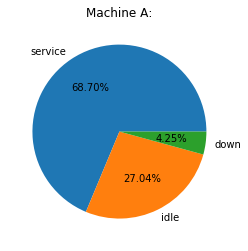

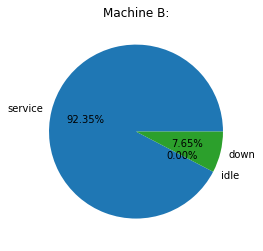

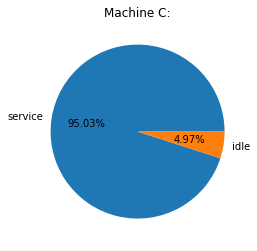

In [162]:
#machine A
MS_label =['service','idle','down']
MS_A =[SUMserviceA,SUMidleA,SUMdownA]
plt.pie(MS_A, labels=MS_label, autopct='%1.2f%%')
plt.title('Machine A:')
plt.show()

#machine B
MS_B =[SUMserviceB,SUMidleB,SUMdownB]
plt.pie(MS_B, labels=MS_label, autopct='%1.2f%%')
plt.title('Machine B:')
plt.show()

#machine C
MS_labelC =['service','idle']
MS_C =[SUMserviceC,SUMidleC]
plt.pie(MS_C, labels=MS_labelC, autopct='%1.2f%%')
plt.title('Machine C:')
plt.show()

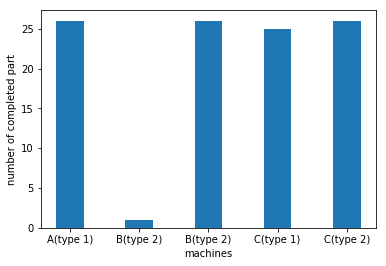

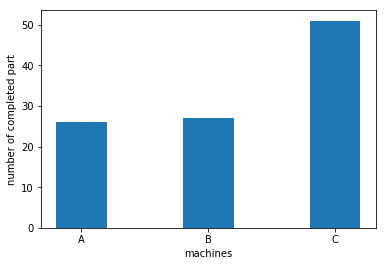

In [163]:
x = [0, 2, 4, 6, 8]
MN =[NA,NB1,NB2,NC1,NC2]
plt.bar(x, MN)
bar_names = ['A(type 1)', 'B(type 2)', 'B(type 2)', 'C(type 1)', 'C(type 2)']
plt.ylabel('number of completed part')
plt.xlabel('machines')
plt.xticks(x, bar_names)
plt.show()

#summery
x = [0, 2, 4]
MN =[NA,NB1+NB2,NC1+NC2]
plt.bar(x, MN)
bar_names = ['A', 'B','C' ]
plt.ylabel('number of completed part')
plt.xlabel('machines')
plt.xticks(x, bar_names)
plt.show()

Text(0.5, 0, 'time')

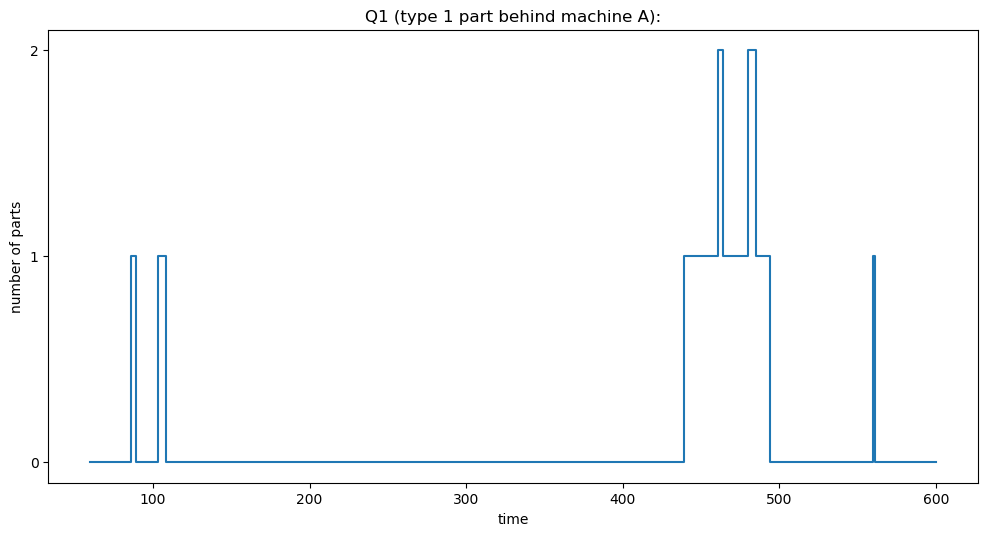

In [164]:
Q1listT=[round(Q1_list[i][0]) for i in range(len(Q1_list))]
Q1listT.append(T)
Q1listAM=[Q1_list[i][1] for i in range(len(Q1_list))]
Q1listAM.append(Q1_list[len(Q1_list)-1][1])
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(Q1listT,Q1listAM,where='post')
plt.yticks([i for i in range(max(Q1listAM)+1)])
plt.title('Q1 (type 1 part behind machine A):')
plt.ylabel('number of parts')
plt.xlabel('time')

Text(0.5, 0, 'time')

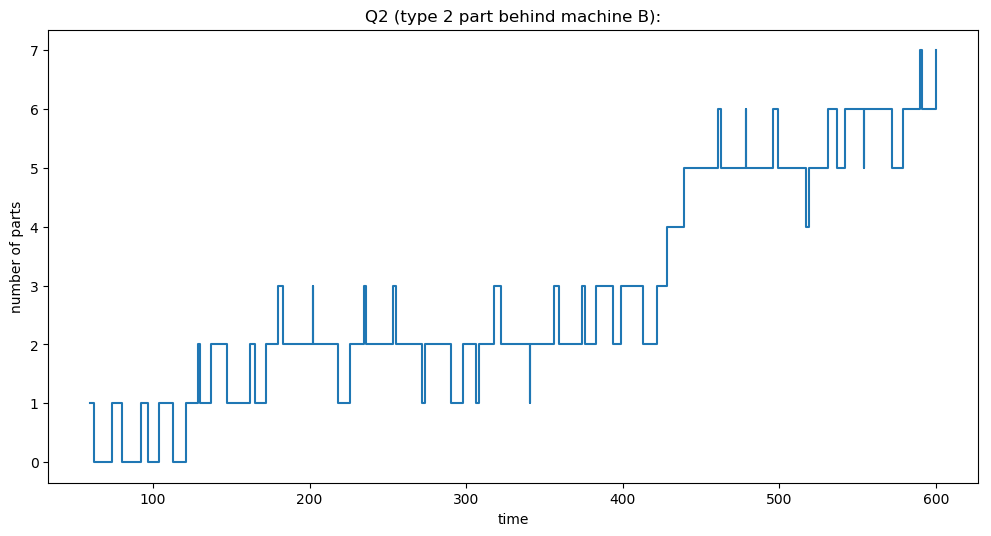

In [165]:
Q2listT=[round(Q2_list[i][0]) for i in range(len(Q2_list))]
Q2listT.append(T)
Q2listAM=[Q2_list[i][1] for i in range(len(Q2_list))]
Q2listAM.append(Q2_list[len(Q2_list)-1][1])
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(Q2listT,Q2listAM,where='post')
plt.yticks([i for i in range(max(Q2listAM)+1)])
plt.title('Q2 (type 2 part behind machine B):')
plt.ylabel('number of parts')
plt.xlabel('time')

Text(0.5, 0, 'time')

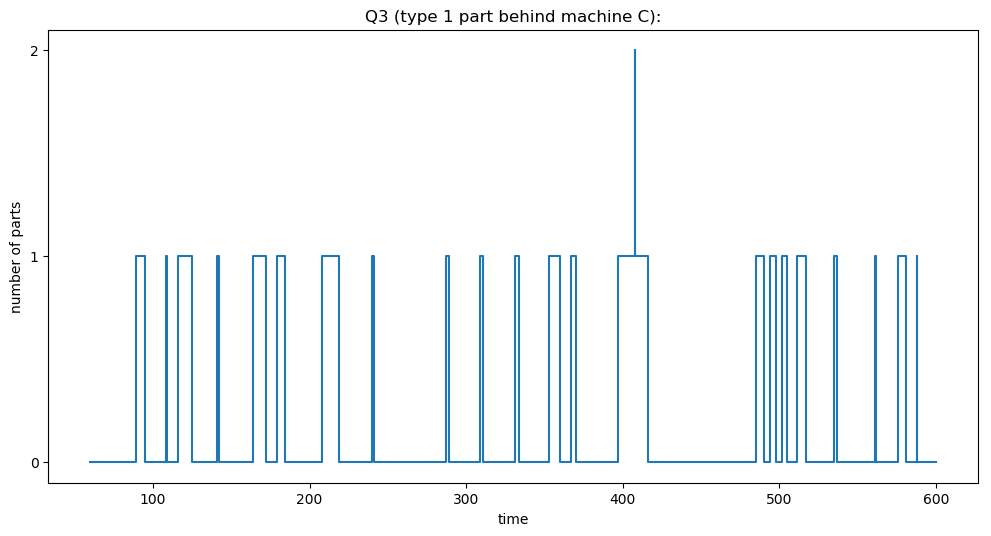

In [166]:
Q3listT=[round(Q3_list[i][0]) for i in range(len(Q3_list))]
Q3listT.append(T)
Q3listAM=[Q3_list[i][1] for i in range(len(Q3_list))]
Q3listAM.append(Q3_list[len(Q3_list)-1][1])
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(Q3listT,Q3listAM,where='post')
plt.yticks([i for i in range(max(Q3listAM)+1)])
plt.title('Q3 (type 1 part behind machine C):')
plt.ylabel('number of parts')
plt.xlabel('time')

Text(0.5, 0, 'time')

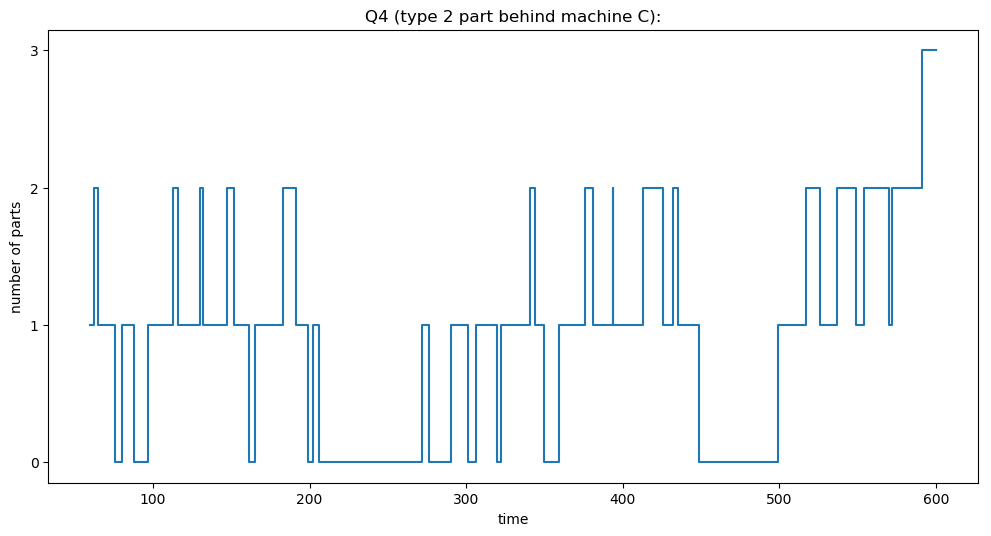

In [167]:
Q4listT=[round(Q4_list[i][0]) for i in range(len(Q4_list))]
Q4listT.append(T)
Q4listAM=[Q4_list[i][1] for i in range(len(Q4_list))]
Q4listAM.append(Q4_list[len(Q4_list)-1][1])
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(Q4listT,Q4listAM,where='post')
plt.yticks([i for i in range(max(Q4listAM)+1)])
plt.title('Q4 (type 2 part behind machine C):')
plt.ylabel('number of parts')
plt.xlabel('time')

Text(0.5, 0, 'time')

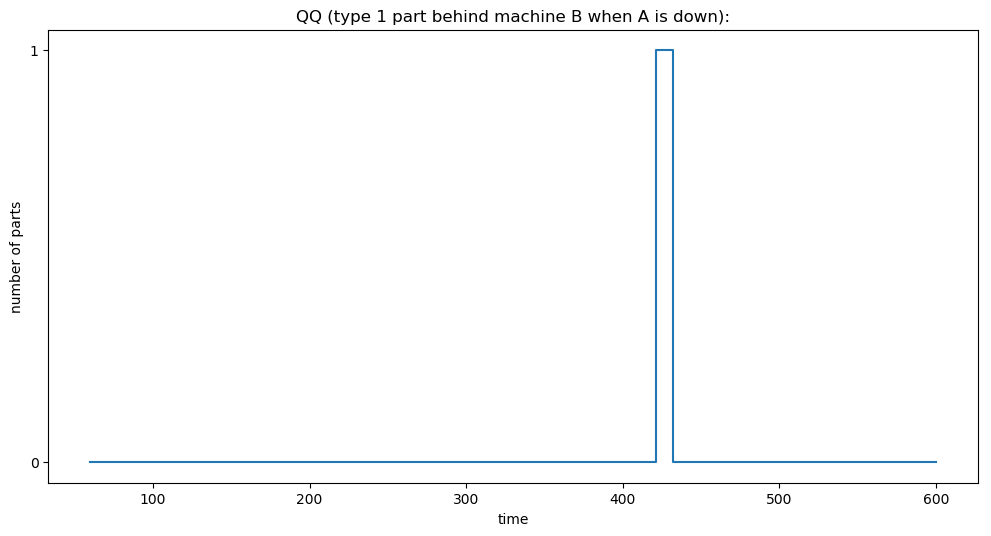

In [168]:
QQlistT=[round(QQ_list[i][0]) for i in range(len(QQ_list))]
QQlistT.append(T)
QQlistAM=[QQ_list[i][1] for i in range(len(QQ_list))]
QQlistAM.append(QQ_list[len(QQ_list)-1][1])
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(QQlistT,QQlistAM,where='post')
plt.yticks([i for i in range(max(QQlistAM)+1)])
plt.title('QQ (type 1 part behind machine B when A is down):')
plt.ylabel('number of parts')
plt.xlabel('time')

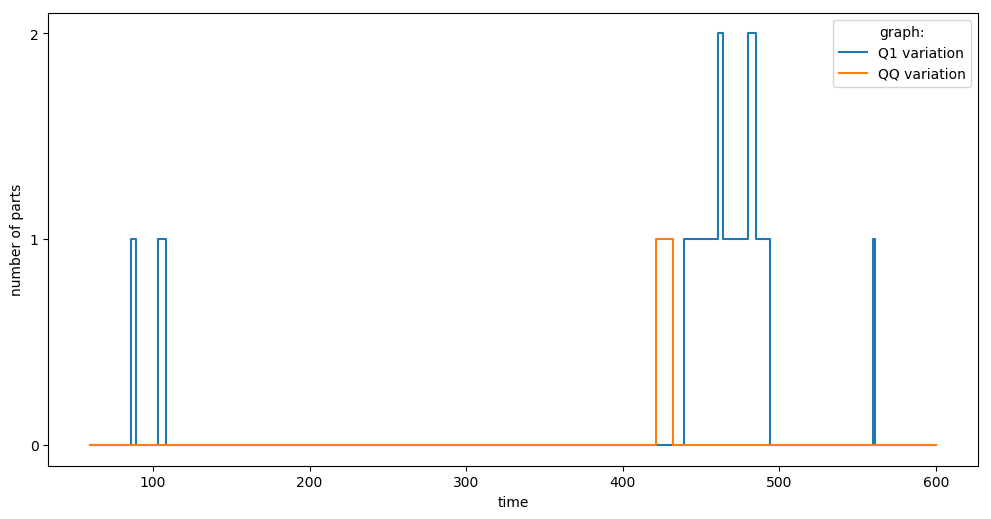

In [169]:
#Q1 & QQ
plt.figure(figsize=(12,6) ,dpi=100 )

plt.step(Q1listT,Q1listAM, label='Q1 variation',where='post')
plt.step(QQlistT,QQlistAM, label='QQ variation',where='post')
plt.yticks([i for i in range(max(Q1listAM)+1)])
plt.legend(title='graph:')
plt.ylabel('number of parts')
plt.xlabel('time')
plt.show()

Text(0.5, 0, 'part code')

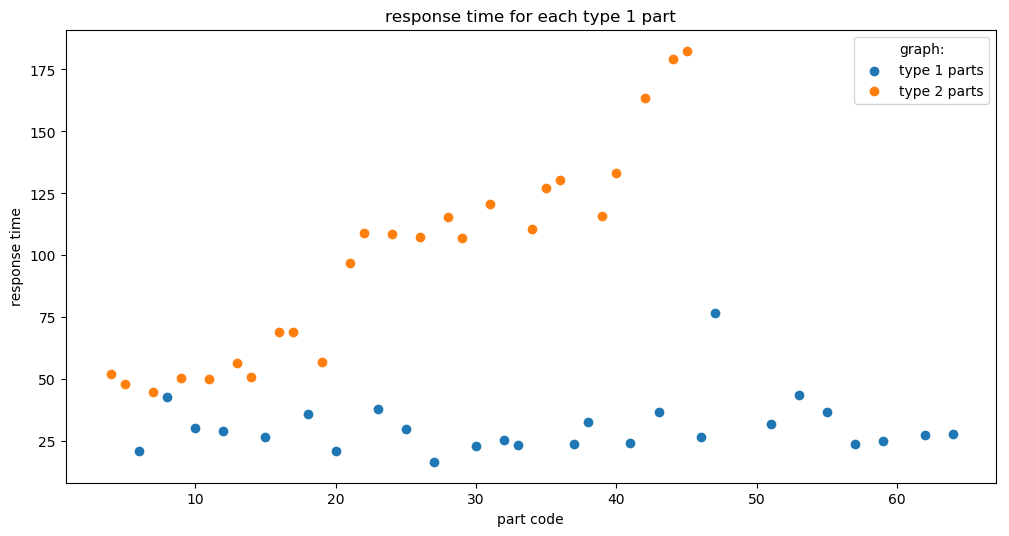

In [170]:
responseApart=[round(responseAparts[i][0]) for i in range(len(responseAparts))]
CODEA=[responseAparts[i][1] for i in range(len(responseAparts))]
responseBpart=[round(responseBparts[i][0]) for i in range(len(responseBparts))]
CODEB=[responseBparts[i][1] for i in range(len(responseBparts))]

plt.figure(figsize=(12,6) ,dpi=100 )
plt.scatter(responseApart,CODEA,label='type 1 parts')
plt.scatter(responseBpart,CODEB,label='type 2 parts')
plt.legend(title='graph:')
plt.title('response time for each type 1 part')
plt.ylabel('response time')
plt.xlabel('part code')